In [ ]:
install.packages("caret")
library(caret)
library(tidyverse)
library(data.table)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to beco

In [ ]:
#https://drive.google.com/file/d/1DFgivEc51cpPiTrFGW1XxEoBWEEo-cWX/view?usp=drive_link
system("gdown --id 1DFgivEc51cpPiTrFGW1XxEoBWEEo-cWX")
system("ls", TRUE)

[1] "games_may2024_cleaned.csv" "sample_data"

In [ ]:
data <- fread("/content/games_may2024_cleaned.csv") %>% as_tibble()
data %>% str()

tibble [83,646 × 46] (S3: tbl_df/tbl/data.frame)
 $ AppID                   : int [1:83646] 730 578080 570 271590 359550 440 105600 4000 252490 1172470 ...
 $ name                    : chr [1:83646] "Counter-Strike 2" "PUBG: BATTLEGROUNDS" "Dota 2" "Grand Theft Auto V" ...
 $ release_date            : IDate[1:83646], format: "2012-08-21" "2017-12-21" ...
 $ required_age            : int [1:83646] 0 0 0 17 17 0 0 0 17 0 ...
 $ price                   : num [1:83646] 0 0 0 0 20 ...
 $ dlc_count               : int [1:83646] 1 0 2 1 9 1 2 0 4 0 ...
 $ detailed_description    : chr [1:83646] "For over two decades, Counter-Strike has offered an elite competitive experience, one shaped by millions of pla"| __truncated__ "LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS for free. Land on strategic locations, loot weapons and supplies,"| __truncated__ "The most-played game on Steam. Every day, millions of players worldwide enter battle as one of over a hundred D"| __truncated__ "When a young stre

In [ ]:
nrow(data)

[1] 83646

**띄어쓰기를 _로 대체**

In [ ]:
colnames(data) <- gsub(" ", "_", colnames(data))

colnames(data)

[1] "AppID"                    "name"                    
 [3] "release_date"             "required_age"            
 [5] "price"                    "dlc_count"               
 [7] "detailed_description"     "about_the_game"          
 [9] "short_description"        "reviews"                 
[11] "header_image"             "website"                 
[13] "support_url"              "support_email"           
[15] "windows"                  "mac"                     
[17] "linux"                    "metacritic_score"        
[19] "metacritic_url"           "achievements"            
[21] "recommendations"          "notes"                   
[23] "supported_languages"      "full_audio_languages"    
[25] "packages"                 "developers"              
[27] "publishers"               "categories"              
[29] "genres"                   "screenshots"             
[31] "movies"                   "user_score"              
[33] "score_rank"               "positive"                
[35] "negative"                 "estimated_owners"        
[37] "average_playtime_forever" "average_playtime_2weeks" 
[39] "median_playtime_forever"  "median_playtime_2weeks"  
[41] "peak_ccu"                 "tags"                    
[43] "pct_pos_total"            "num_reviews_total"       
[45] "pct_pos_recent"           "num_reviews_recent"

**row수가 8만개 이상이므로 줄이기 위해 + 오래된 데이터들은 제외하기 위해 2323~2024로 연도 축소**

In [ ]:
# 데이터의 날짜를 변환
data$release_date <- as.Date(data$release_date, format = "%Y-%m-%d")

# 필요한 변수만 선택 및 필터링
filtered_data <- data %>%
  filter(release_date >= as.Date("2023-01-01") & release_date <= as.Date("2024-12-31"))
 #%>%
  #select(release_date, price, categories, num_reviews_total, pct_pos_total,
         #genres, mac, linux, windows)

# 결과 확인
print(head(filtered_data))


# A tibble: 6 × 46
    AppID name    release_date required_age price dlc_count detailed_description
    <int> <chr>   <date>              <int> <dbl>     <int> <chr>               
1  553850 HELLDI… 2024-02-08             17 40.0          0 "Digital Deluxe Edi…
2 1086940 Baldur… 2023-08-03             17 51.0          1 "Gather your party …
3 1966720 Lethal… 2023-10-23              0  9.99         0 "You are a contract…
4 2357570 Overwa… 2023-08-10              0  0            2 ""                  
5 1623730 Palwor… 2024-01-18              0 30.0          1 "Q. What kind of ga…
6 2584190 Sunlan… 2023-09-25              0  1.99         0 "CHECK OUT GRAND FO…
# ℹ 39 more variables: about_the_game <chr>, short_description <chr>,
#   reviews <chr>, header_image <chr>, website <chr>, support_url <chr>,
#   support_email <chr>, windows <lgl>, mac <lgl>, linux <lgl>,
#   metacritic_score <int>, metacritic_url <chr>, achievements <int>,
#   recommendations <int>, notes <chr>, supported_langua

In [ ]:
nrow(filtered_data)

[1] 21136

In [ ]:
hist(filtered_data$num_reviews_total)

In [ ]:
summary(filtered_data$num_reviews_total)

In [ ]:
summary(filtered_data$pct_pos_total)

In [ ]:
hist(filtered_data$pct_pos_total)

In [ ]:
hist(filtered_data$price)

In [ ]:
filtered_data <- filtered_data %>%
  filter(num_reviews_total >= 0)

In [ ]:
filtered_data <- filtered_data %>%
  filter(pct_pos_total >= 0)

**로그변환 후 히스토그램 재확인**

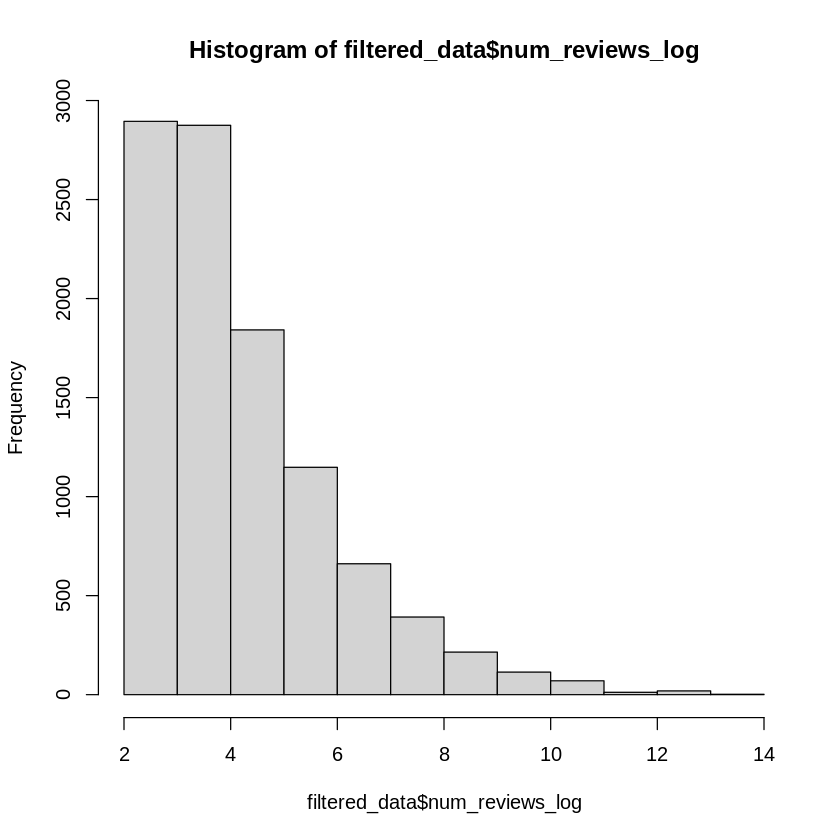

In [ ]:
filtered_data <- filtered_data %>%
  mutate(num_reviews_log = log1p(num_reviews_total))

hist(filtered_data$num_reviews_log)

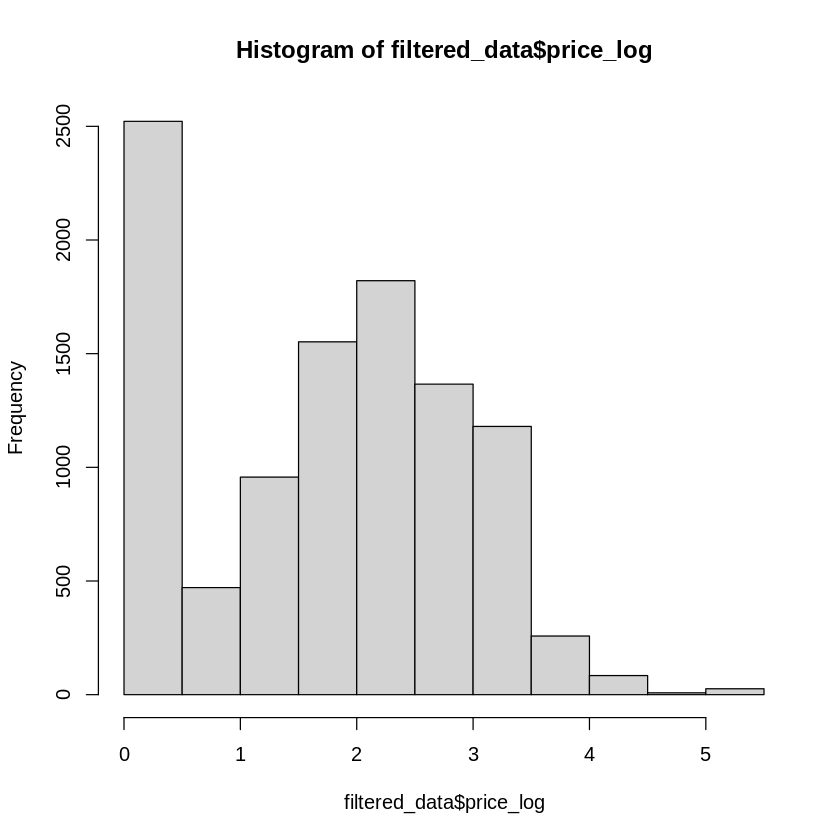

In [ ]:
filtered_data <- filtered_data %>%
  mutate(price_log = log1p(price))

hist(filtered_data$price_log)

**Success 새 반응변수 정의**

In [ ]:
filtered_data <- filtered_data %>%
  mutate(
    num_reviews_log_scaled = (num_reviews_log - min(num_reviews_log)) / (max(num_reviews_log) - min(num_reviews_log)),
    pct_pos_scaled = pct_pos_total / 100
  )

filtered_data <- filtered_data %>%
  mutate(
    success_score = 0.5 * num_reviews_log_scaled + 0.5 * pct_pos_scaled
  )

# 성공 여부 기준을 상위 20%로 정의함
threshold_score <- quantile(filtered_data$success_score, 0.60, na.rm = TRUE)

filtered_data <- filtered_data %>%
  mutate(Success = ifelse(success_score >= threshold_score, 1, 0))


In [ ]:
summary(filtered_data$num_reviews_log)
summary(filtered_data$pct_pos_scaled)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.398   2.944   3.714   4.237   5.050  13.371 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.7300  0.8600  0.8169  0.9400  1.0000 

In [ ]:
filtered_data <- filtered_data %>%
  mutate(Success = as.factor(ifelse(success_score >= threshold_score, 1, 0)))

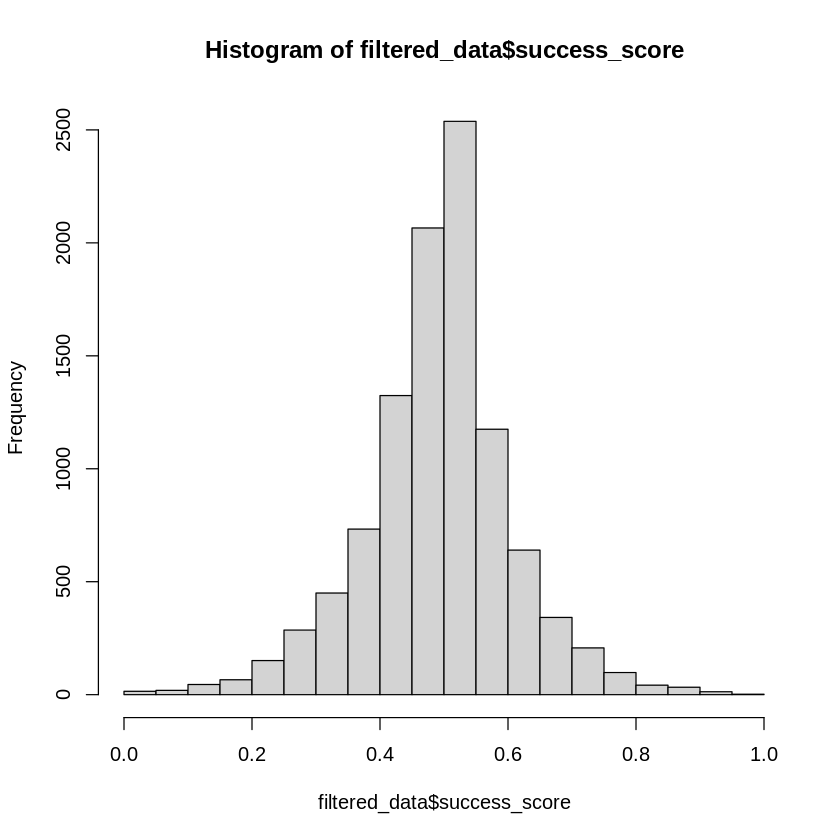

In [ ]:
hist(filtered_data$success_score)

**결측값 확인 -> 결측값 없으므로 결측값 처리 방법 X**

In [ ]:
na_summary <- colSums(is.na(filtered_data[, c("price", "categories",
                                              "num_reviews_total", "pct_pos_total", "Success",
                                              "genres", "mac", "linux", "windows")]))

print(na_summary)

            price        categories num_reviews_total     pct_pos_total 
                0                 0                 0                 0 
          Success            genres               mac             linux 
                0                 0                 0                 0 
          windows 
                0 


**이상값 확인 -> 총 리뷰 수에 이상값이 나타난 걸로 보이지만, 이 변수는 Success라는 새 반응변수를 만든는데 쓰이므로 유지**

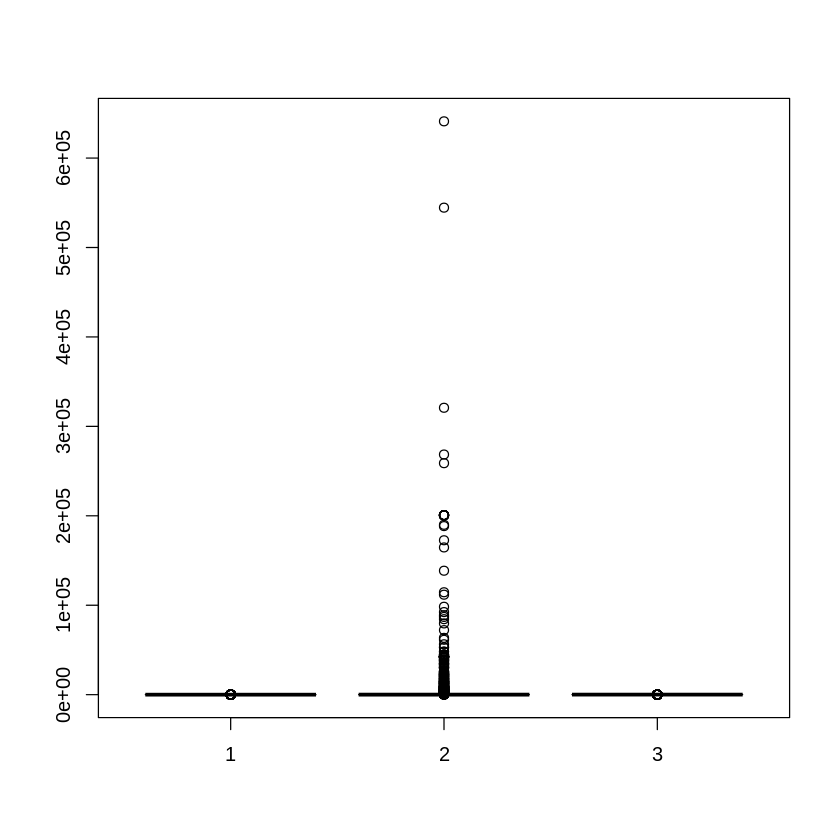

In [ ]:
boxplot(filtered_data$price, filtered_data$num_reviews_total, filtered_data$pct_pos_total)

**Window, Mac, Linux 이진화**

In [ ]:
filtered_data <- filtered_data %>%
  mutate(
    windows_binary = ifelse(windows == "TRUE", 1, 0),
    mac_binary = ifelse(mac == "TRUE", 1, 0),
    linux_binary = ifelse(linux == "TRUE", 1, 0)
  )

**카테고리, 장르 더미형 변환**

In [ ]:
# 범주형 데이터인 장르와 카테고리의 리스트 표기를 제거하여 더미형 변환이 더 쉽도록 함
filtered_data_cleaned <- filtered_data %>%
  mutate(
    genres = gsub("\\[|\\]|\\'|\\\"", "", genres),
    categories = gsub("\\[|\\]|\\'|\\\"", "", categories)
  )

In [ ]:
# 쉼표로 구분
filtered_data_cleaned <- filtered_data_cleaned %>%
  separate_rows(genres, sep = ", ") %>%
  separate_rows(categories, sep = ", ")

In [ ]:
# 장르 더미형 변환
genre_dummies_model <- dummyVars("~ genres", data = filtered_data_cleaned)
genre_dummies <- predict(genre_dummies_model, newdata = filtered_data_cleaned)
genre_dummies_df <- as.data.frame(genre_dummies)

# 카테고리 더미형 변환
category_dummies_model <- dummyVars("~ categories", data = filtered_data_cleaned)
category_dummies <- predict(category_dummies_model, newdata = filtered_data_cleaned)
category_dummies_df <- as.data.frame(category_dummies)

In [ ]:
# 이진화를 진행했던 플랫폼 지원 여부와 더미형 변환을 진행한 장르, 카테고리를 한 데이터로 묶어 새로 저장 후 잘 변환되었는지 확인
final_data <- cbind(
  filtered_data_cleaned %>% select(Success, price_log, windows_binary, mac_binary, linux_binary),
  genre_dummies_df,
  category_dummies_df
)

**상관관계 분석 전 장르와 카테고리 중요 변수 추출**

In [ ]:
colnames(final_data) <- make.names(colnames(final_data), unique = TRUE)

In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
price_log,72.5406452,79.3873998,92.4989314400,2632.5467324
windows_binary,0.0000000,0.0000000,0.0000000000,0.0000000
mac_binary,43.2157051,10.3838640,57.1385852964,205.8673122
linux_binary,40.7711854,-11.5324538,51.4014697767,166.3574321
genres,-3.0588750,10.3084113,4.3663351495,5.2803357
genresAction,-0.9497458,6.6534370,11.0018687912,43.9980673
genresAdventure,5.1828899,-4.1745510,2.7909179813,38.5535608
genresCasual,-1.1128883,13.4099384,18.4895480907,50.6348246
genresDesign...Illustration,-0.5799292,1.0010015,-0.0005961066,0.4541224
genresEarly.Access,5.4542876,2.3955370,12.0093311070,43.1770234


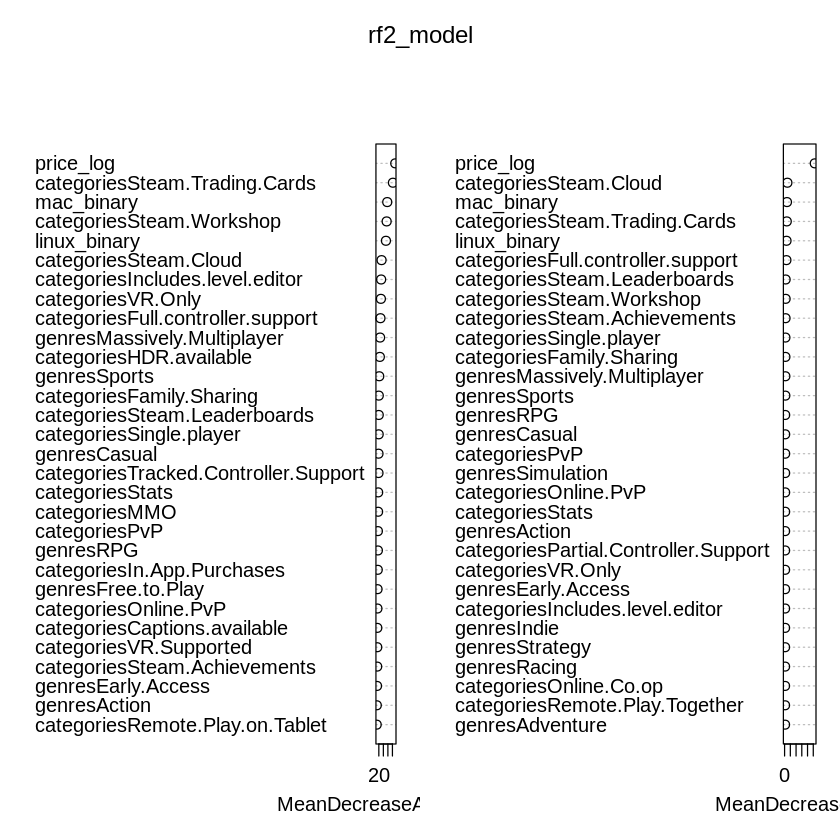

In [ ]:
rf2_model <- randomForest(Success ~ ., data = final_data, importance = TRUE)

importance(rf2_model)

varImpPlot(rf2_model)

**상관관계 분석**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



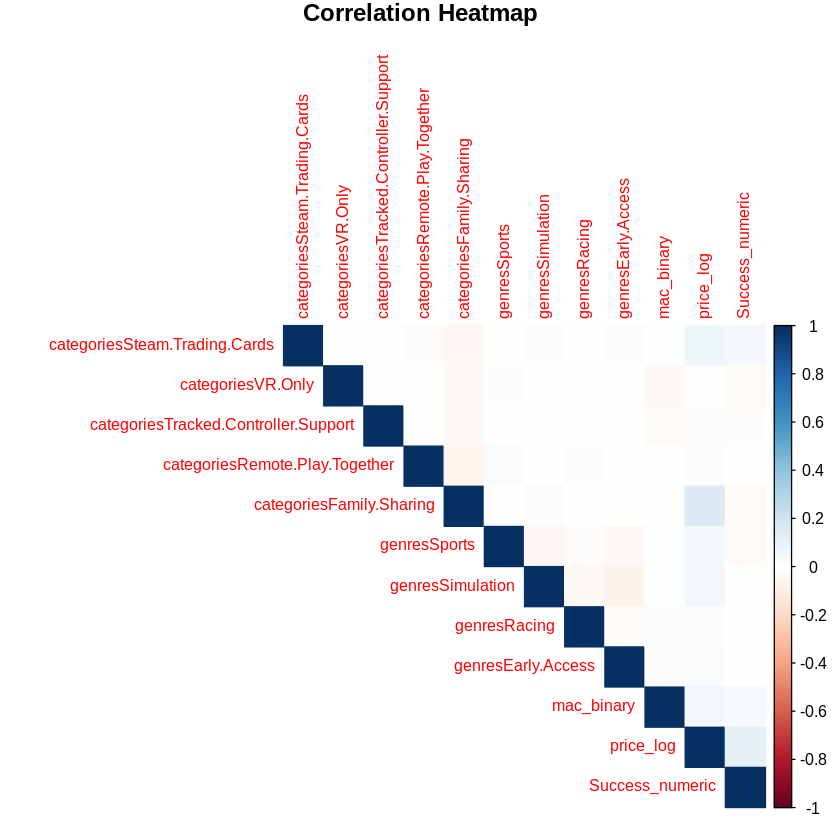

In [ ]:
# 상위 5개 카테고리와 장르 변수 선택
selected_vars <- c(
  "Success",
  "categoriesSteam.Trading.Cards",
  "categoriesVR.Only",
  "categoriesTracked.Controller.Support",
  "categoriesRemote.Play.Together",
  "categoriesFamily.Sharing",
  "genresSports",
  "genresSimulation",
  "genresRacing",
  "genresEarly.Access",
  "genresAdventure ",
  "mac_binary",
  "price_log"
)

valid_vars <- selected_vars[selected_vars %in% colnames(final_data)]
reduced_data <- final_data[, valid_vars]

# Success 변수를 수치형으로 변환
reduced_data$Success_numeric <- as.numeric(reduced_data$Success) - 1

# 상관관계 행렬 계산
cor_matrix <- cor(reduced_data[, -1], use = "complete.obs")

# 상관관계 히트맵
install.packages("corrplot")
library(corrplot)
corrplot(
  cor_matrix,
  method = "color",
  type = "upper",
  tl.cex = 0.8,
  title = "Correlation Heatmap",
  mar = c(0, 0, 1, 0)
)


In [ ]:
last_data <- cbind(
  filtered_data_cleaned %>% select(Success, price_log, mac_binary),
  genre_dummies_df %>% select(
    ##"genresSports",
    "genresSimulation",
    "genresRacing",
    "genresEarly Access",
    "genresAdventure"
  )
  #category_dummies_df %>% select(
   # "categoriesSteam Trading Cards",
    #"categoriesVR Only",
    #"categoriesTracked Controller Support",
    #"categoriesRemote Play Together",
    #"categoriesFamily Sharing"
#)
)

**예측 모델링**

In [ ]:
install.packages("rpart.plot")
library(e1071)
library(rpart)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘e1071’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




In [ ]:
# F1 스코어 계산
f1_score <- function(predictions, actuals) {
  cm <- confusionMatrix(predictions, actuals)
  precision <- cm$byClass["Pos Pred Value"]
  recall <- cm$byClass["Sensitivity"]
  F1 <- 2 * ((precision * recall) / (precision + recall))
  return(F1)
}

In [ ]:
set.seed(123)
train_index <- createDataPartition(last_data$Success, p = 0.8, list = FALSE)
train_data <- last_data[train_index, ]
test_data <- last_data[-train_index, ]

In [ ]:
install.packages("MLmetrics")
library(MLmetrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’



Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall




In [ ]:
# 로지스틱 회귀
logistic_model <- glm(Success ~ ., data = train_data, family = binomial)

logistic_predictions <- predict(logistic_model, newdata = test_data, type = "response")

logistic_class <- ifelse(logistic_predictions > 0.5, 1, 0)

logistic_confusion <- confusionMatrix(factor(logistic_class), factor(test_data$Success))
print(logistic_confusion)

logistic_f1 <- F1_Score(y_true = test_data$Success, y_pred = logistic_class)
cat("F1 Score (Logistic Regression):", logistic_f1, "\n")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 14335  9826
         1  1385  1770
                                          
               Accuracy : 0.5896          
                 95% CI : (0.5837, 0.5954)
    No Information Rate : 0.5755          
    P-Value [Acc > NIR] : 1.217e-06       
                                          
                  Kappa : 0.0713          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9119          
            Specificity : 0.1526          
         Pos Pred Value : 0.5933          
         Neg Pred Value : 0.5610          
             Prevalence : 0.5755          
         Detection Rate : 0.5248          
   Detection Prevalence : 0.8845          
      Balanced Accuracy : 0.5323          
                                          
       'Positive' Class : 0               
                  

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11492  6506
         1  4228  5090
                                          
               Accuracy : 0.607           
                 95% CI : (0.6012, 0.6128)
    No Information Rate : 0.5755          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.1745          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7310          
            Specificity : 0.4389          
         Pos Pred Value : 0.6385          
         Neg Pred Value : 0.5463          
             Prevalence : 0.5755          
         Detection Rate : 0.4207          
   Detection Prevalence : 0.6589          
      Balanced Accuracy : 0.5850          
                                          
       'Positive' Class : 0               
                  

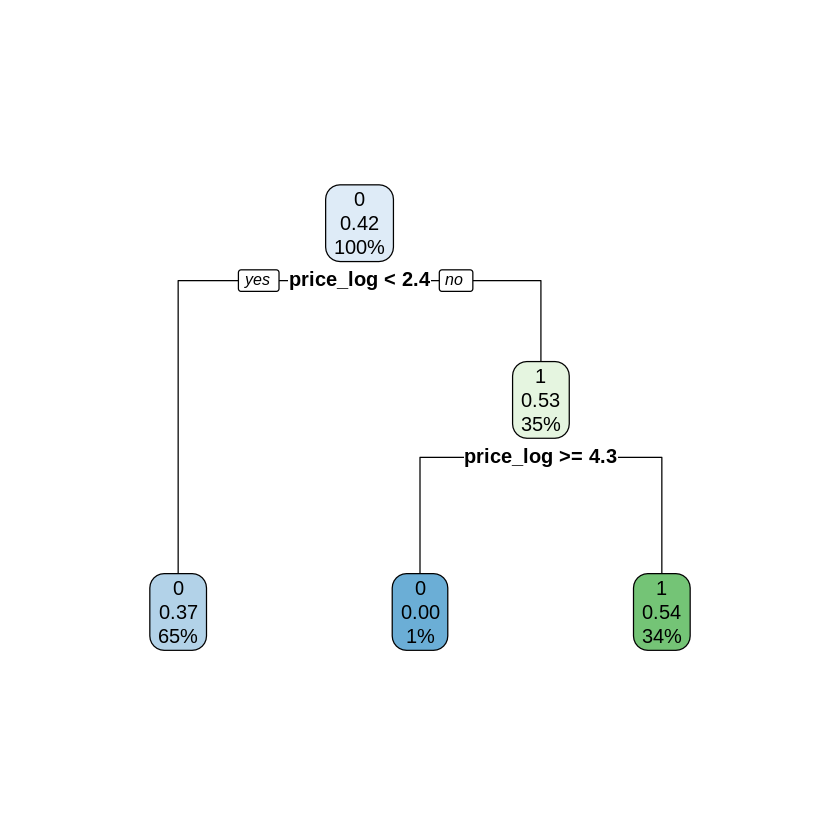

In [ ]:
# Decision Tree
dt_model <- rpart(Success ~ ., data = train_data, method = "class")

rpart.plot(dt_model)

dt_predictions <- predict(dt_model, newdata = test_data, type = "class")
dt_confusion <- confusionMatrix(factor(dt_predictions), factor(test_data$Success))
print(dt_confusion)

dt_f1 <- f1_score(dt_predictions, test_data$Success)
cat("F1 Score :", dt_f1, "\n")

In [ ]:
# SVM
svm_model <- svm(Success ~ ., data = train_data, kernel = "radial", cost = 1, gamma = 0.1)

svm_preds <- predict(svm_model, test_data)
confusionMatrix(factor(svm_preds), factor(test_data$Success))

In [ ]:
names(train_data) <- gsub(" ", ".", names(train_data))
names(test_data) <- gsub(" ", ".", names(test_data))

In [ ]:
selected_vars <- c(
  "Success",
  "price_log",
  "mac_binary",
  #"genresSports",
  "genresSimulation",
  "genresRacing",
  "genresEarly.Access",
  "genresAdventure"
)

train_data_selected <- train_data[, selected_vars]
test_data_selected <- test_data[, selected_vars]

rf_model <- randomForest(Success ~ ., data = train_data_selected, ntree = 500)

rf_predictions <- predict(rf_model, newdata = test_data_selected)

rf_confusion <- confusionMatrix(factor(rf_predictions), factor(test_data_selected$Success))
print(rf_confusion)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 13068  7747
         1  2652  3849
                                          
               Accuracy : 0.6193          
                 95% CI : (0.6135, 0.6251)
    No Information Rate : 0.5755          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.1732          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8313          
            Specificity : 0.3319          
         Pos Pred Value : 0.6278          
         Neg Pred Value : 0.5921          
             Prevalence : 0.5755          
         Detection Rate : 0.4784          
   Detection Prevalence : 0.7620          
      Balanced Accuracy : 0.5816          
                                          
       'Positive' Class : 0               
                  